# The Oxford-IIIT Pet Dataset

https://www.robots.ox.ac.uk/~vgg/data/pets/

* A dataset of 7,349 images of 4,978 dogs and 2,371 cats.
* Each image (usually) contains a single pet. The images have a large variations in scale, pose and lighting.
* Each image is associated with:
    * A label of the pet species (cat or dog) and breed. There are 37 breeds - 25 dog breeds, and 12 cat breeds. There are roughly 200 images per breed.
    * A bounding box around the pet's head
    * A full body pixel-level segmentation.

### Annotation Examples of the Oxford Pets Dataset

![Annotation Examples of the Oxford Pets Dataset](../images/oxford_pets_dataset/oxford_pet_annotations_examples.jpg)

* The dataset was [presented](https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/) in 2012, in an IEEE Conference on Computer Vision and Pattern Recognition. It was presented together with a non-neural model for classification, head-localization and segmentation. The model achieved 59% accuracy on breed classification.
* The dataset is distributed under the [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).
* Representative images of the breeds are shown in the dataset's webpage together with the number of images per breed.

### Downloading the Dataset
The dataset can be downloaded from the Oxford [website](http://www.robots.ox.ac.uk/~vgg/data/pets/).

**To the Student**: Download and extract the dataset to the 'data' folder.

The data is stored as a tar gzip file ([introduction to the file format](https://pureinfotech.com/extract-tar-gz-files-windows-11/#extract_tar_without_windows10linux)). 

Extract both the images and the annotations from the command line using:
```
tar -xvzf C:/PATH/TO/FILE/FILE-NAME.tar.gz -C C:/PATH/TO/FOLDER/EXTRACTION
```

It is recommended to save it in the `/data` folder, and extract it in its own subfolder.

In [35]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

### Listing the File Paths

Now that we have the dataset, let's take a first look at it. First, let's list the file paths of the images.

A file path is the location of a file in the computer's file system: the folder of the file and its name, for example: `C:/Users/USER_NAME/Documents/FILE_NAME`.

Here we are creating three sorted lists of the file paths of the images, annotations and segmentation ground truth. The lists are sorted by the file name, so that the image, annotation and segmentation ground truth of the same sample will be in the same index in the lists.


In [47]:
# get the paths of all the images.
images_folder = "../data/the_oxford_IIIT_pet_dataset/images/"

image_file_paths = sorted(
    [os.path.join(images_folder, fname)
     for fname in os.listdir(images_folder)
     if fname.endswith(".jpg")])

In [48]:
print(f"{len(image_file_paths)} image file paths found.")
print("First 5 file paths:\n", "\n".join(image_file_paths[:5]))

7390 image file paths found.
First 5 file paths:
 ../data/the_oxford_IIIT_pet_dataset/images/Abyssinian_1.jpg
../data/the_oxford_IIIT_pet_dataset/images/Abyssinian_10.jpg
../data/the_oxford_IIIT_pet_dataset/images/Abyssinian_100.jpg
../data/the_oxford_IIIT_pet_dataset/images/Abyssinian_101.jpg
../data/the_oxford_IIIT_pet_dataset/images/Abyssinian_102.jpg


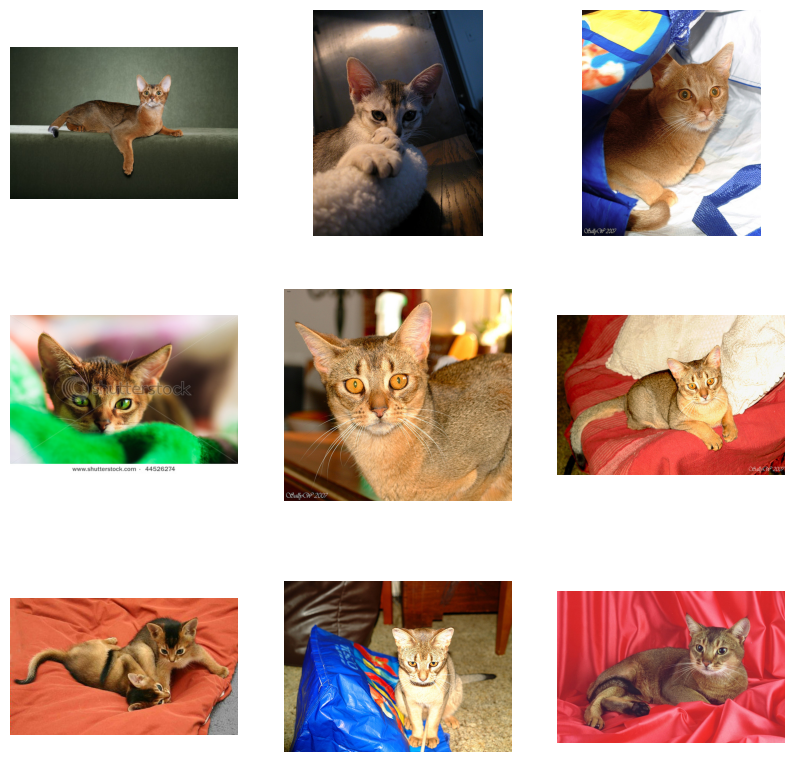

In [38]:
# present the first 9 images in a 3x3 grid.
plt.figure(figsize=(10, 10))
for i, image_file_path in enumerate(image_file_paths[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(load_img(image_file_path))
    plt.axis("off")

Note that since the file paths are sorted, all the images above are of the same breed.

### The Segmentation Annotations

The segmentation ground truth is a pixel level classification. Each pixel is annotated as either (see README in the annotation folder):
* 1: Foreground
* 2: Background 
* 3: Not classified

In [49]:

segmentation_folder = "../data/the_oxford_IIIT_pet_dataset/annotations/trimaps/"

segmentation_file_paths = sorted(
    [os.path.join(segmentation_folder, fname)
     for fname in os.listdir(segmentation_folder)
     if fname.endswith(".png") and not fname.startswith(".")])

In [50]:
print(f"{len(segmentation_file_paths)} segmentation file paths found.")
print("First 5 file paths:\n", "\n".join(segmentation_file_paths[:5]))

7390 segmentation file paths found.
First 5 file paths:
 ../data/the_oxford_IIIT_pet_dataset/annotations/trimaps/Abyssinian_1.png
../data/the_oxford_IIIT_pet_dataset/annotations/trimaps/Abyssinian_10.png
../data/the_oxford_IIIT_pet_dataset/annotations/trimaps/Abyssinian_100.png
../data/the_oxford_IIIT_pet_dataset/annotations/trimaps/Abyssinian_101.png
../data/the_oxford_IIIT_pet_dataset/annotations/trimaps/Abyssinian_102.png


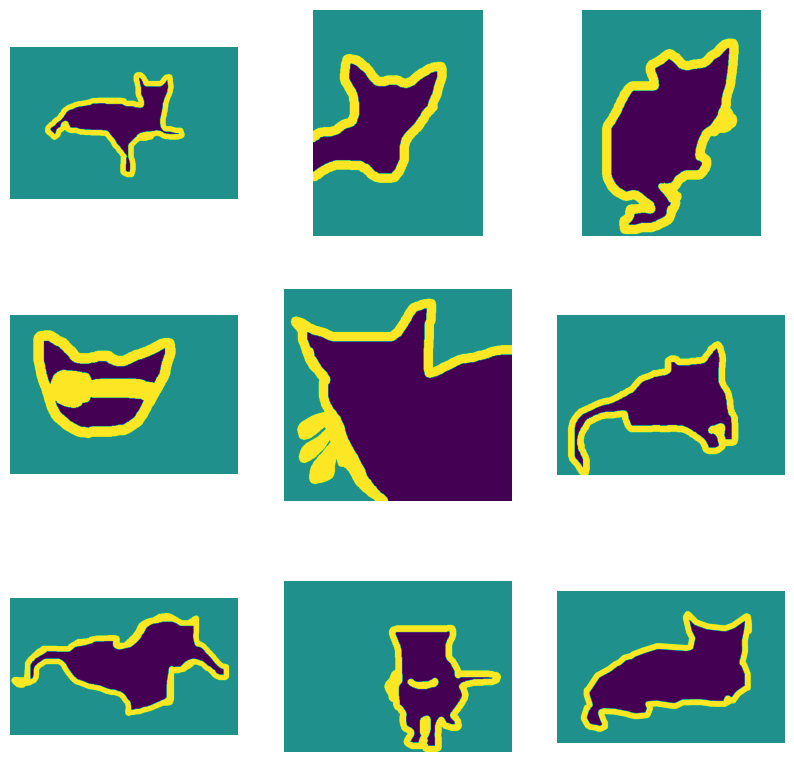

In [70]:
# present the first 9 segmentation annotations in a 3x3 grid.
plt.figure(figsize=(10, 10))
for i, segmentation_file_path in enumerate(segmentation_file_paths[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(load_img(segmentation_file_path, color_mode="grayscale"))
    plt.axis("off")

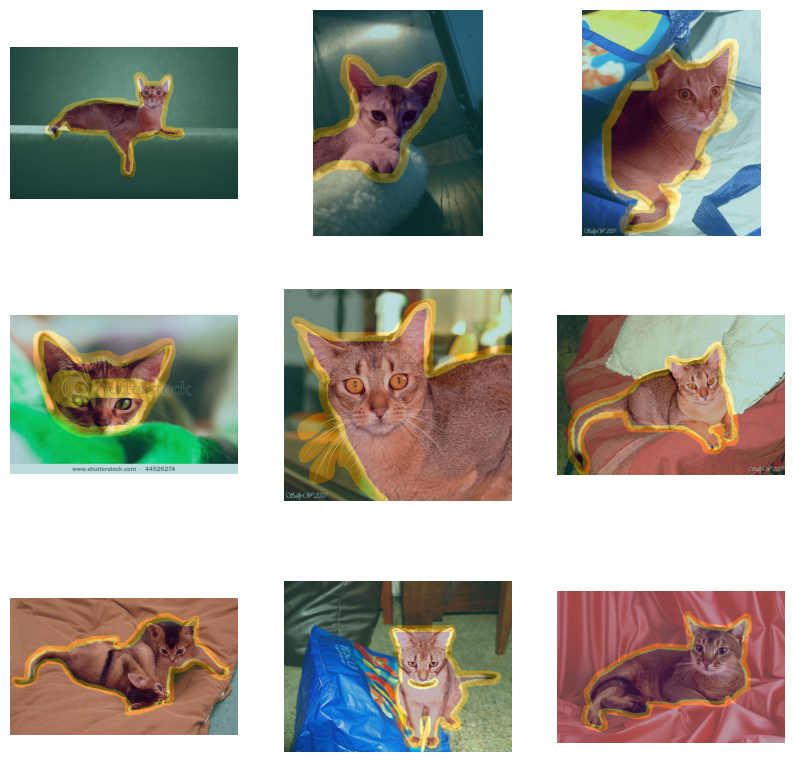

In [72]:
#overlay the segmentation annotations on the images.
plt.figure(figsize=(10, 10))
for i, (image_file_path, segmentation_file_path) in enumerate(zip(image_file_paths[:9], segmentation_file_paths[:9])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(load_img(image_file_path))
    plt.imshow(load_img(segmentation_file_path, color_mode="grayscale"), alpha=0.3)
    plt.axis("off")

## Bounding boxes

In [40]:
bounding_box_folder = "../data/the_oxford_IIIT_pet_dataset/annotations/xmls/"
bounding_box_file_paths = sorted(
    [os.path.join(bounding_box_folder, fname)
     for fname in os.listdir(bounding_box_folder)
     if fname.endswith(".xml") and not fname.startswith(".")])

In [41]:
print(f"{len(bounding_box_file_paths)} bounding box file paths found.")
print("First 5 file paths:\n", "\n".join(bounding_box_file_paths[:5]))

3686 bounding box file paths found.
First 5 file paths:
 ../data/the_oxford_IIIT_pet_dataset/annotations/xmls/Abyssinian_1.xml
../data/the_oxford_IIIT_pet_dataset/annotations/xmls/Abyssinian_10.xml
../data/the_oxford_IIIT_pet_dataset/annotations/xmls/Abyssinian_100.xml
../data/the_oxford_IIIT_pet_dataset/annotations/xmls/Abyssinian_101.xml
../data/the_oxford_IIIT_pet_dataset/annotations/xmls/Abyssinian_102.xml


* The bounding box data is stored in a [XML format](https://en.wikipedia.org/wiki/XML).
We can read it using [Python's native xml library](https://docs.python.org/3/library/xml.html).
* The bounding box is given as the top left and bottom right corners of the box.
* The bounding box is given in the original image size.
* As seen above, only 3686 were found.

In [11]:
import xml.dom.minidom

# parse the XML file
dom = xml.dom.minidom.parse(bounding_box_file_paths[0])

# print the XML data in a formatted way
print(dom.toprettyxml())

<?xml version="1.0" ?>
<annotation>
	<folder>OXIIIT</folder>
	<filename>Abyssinian_1.jpg</filename>
	<source>
		<database>OXFORD-IIIT Pet Dataset</database>
		<annotation>OXIIIT</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>600</width>
		<height>400</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>cat</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<occluded>0</occluded>
		<bndbox>
			<xmin>333</xmin>
			<ymin>72</ymin>
			<xmax>425</xmax>
			<ymax>158</ymax>
		</bndbox>
		<difficult>0</difficult>
	</object>
</annotation>



In [73]:
from collections import namedtuple
import xml.etree.ElementTree as ET
#BoundingBox
Bounding_Box = namedtuple('Bounding_Box', 'xmin ymin xmax ymax')
# The following function will read the xml and return the values for xmin, ymin, xmax, ymax for formulating the bounding box
def building_bounding_box(path_to_xml_annotation):
    tree = ET.parse(path_to_xml_annotation)
    root = tree.getroot()
    path_to_box = './object/bndbox/'
    xmin = int(root.find(path_to_box + "xmin").text)
    ymin = int(root.find(path_to_box + "ymin").text)
    xmax = int(root.find(path_to_box + "xmax").text)
    ymax = int(root.find(path_to_box + "ymax").text)
    return Bounding_Box(xmin, ymin, xmax, ymax)

In [74]:
bounding_box = building_bounding_box(bounding_box_file_paths[0])
print(bounding_box)

Bounding_Box(xmin=333, ymin=72, xmax=425, ymax=158)


(-0.5, 599.5, 399.5, -0.5)

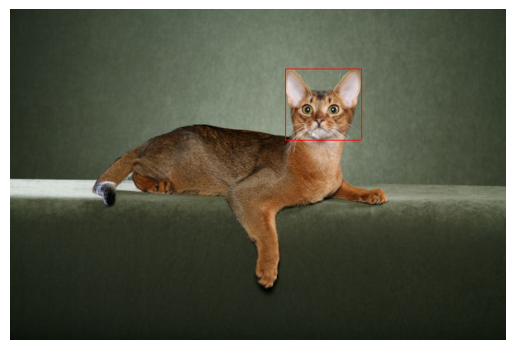

In [44]:
# create a function that will draw the bounding box on the image
def draw_bounding_box(image, bounding_box):
    # convert the image to an array
    img_array = img_to_array(image)
    # copy the array
    img_copy = np.copy(img_array)
    # draw the bounding box
    xmin, ymin, xmax, ymax = bounding_box
    # draw the top line
    img_copy[ymin, xmin:xmax] = [255, 0, 0]
    # draw the bottom line
    img_copy[ymax, xmin:xmax] = [255, 0, 0]
    # draw the left line
    img_copy[ymin:ymax, xmin] = [255, 0, 0]
    # draw the right line
    img_copy[ymin:ymax, xmax] = [255, 0, 0]
    # return the image with bounding box
    return img_copy

# draw the bounding box on the image
image = load_img(image_file_paths[0])
image_with_bounding_box = draw_bounding_box(image, bounding_box)
# plot the image
plt.imshow(image_with_bounding_box.astype("uint8"))
plt.axis("off")